In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_results = pd.read_csv("results_legislatives_2024_T1.csv")
data_stats = pd.read_csv("stats_legislatives_2024_T1.csv")

## Stats nationales

In [3]:
inscrits = data_stats[data_stats['Type']=='Inscrits']['Nombre'].sum()
exprimes = data_stats[data_stats['Type']=='Exprimés']['Nombre'].sum()
participation = exprimes/inscrits

print(f"Inscrits totaux nationaux : {inscrits}")
print(f"Exprimés totaux nationaux : {exprimes}")
print(f"Participation : {participation*100:.2f}%")

Inscrits totaux nationaux : 49332761
Exprimés totaux nationaux : 32060277
Participation : 64.99%


## Résultats nationaux

In [4]:
nuances = np.unique(data_results['Nuance'])
nuances

array(['COM', 'DIV', 'DSV', 'DVC', 'DVD', 'DVG', 'ECO', 'ENS', 'EXD',
       'EXG', 'FI', 'HOR', 'LR', 'RDG', 'REC', 'REG', 'RN', 'SOC', 'UDI',
       'UG', 'UXD', 'VEC'], dtype=object)

In [5]:
results_nuances = data_results.groupby(['Nuance']).sum()[['Voix']].sort_values(by='Voix', ascending=False).copy()

results_nuances['% Inscrits'] = 100*results_nuances['Voix']/inscrits
results_nuances['% Exprimés'] = 100*results_nuances['Voix']/exprimes
results_nuances['Sièges'] = [len(np.where(data_results[data_results['Nuance']==nuance]['Elu(e)']=='OUI')[0]) for nuance in results_nuances.index]
results_nuances

,Voix,% Inscrits,% Exprimés,Sièges
Nuance,,,,
RN,9377297,19.008255,29.248958,37
UG,8974566,18.191899,27.992790,32
ENS,6425217,13.024240,20.041053,2
LR,2104918,4.266775,6.565502,1
UXD,1251210,2.536266,3.902680,1
DVD,1172548,2.376814,3.657323,2
DVG,491069,0.995422,1.531705,0
DVC,391408,0.793404,1.220850,0
EXG,367158,0.744248,1.145212,0


## Deuxièmes tours

In [7]:
nombre_T2 = {code: len(np.where(data_results[data_results['Code circonscription']==code]['Elu(e)']!='NON')[0]) 
             for code in data_results['Code circonscription']}

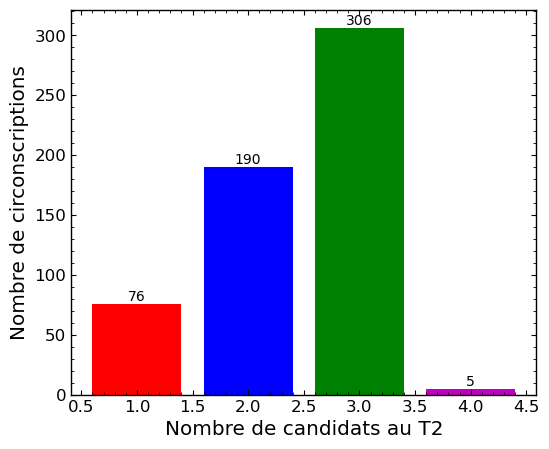

In [16]:
fig, ax = plt.subplots(figsize=(6,5))
counts, edges, bars = ax.hist(nombre_T2.values(), color='k', bins=4, range=(1,5), align='left', rwidth=0.8)
colors = ['r', 'b', 'g', 'm']
for i, bar in enumerate(bars):
    bar.set_facecolor(colors[i])
ax.bar_label(bars)
ax.set_ylabel("Nombre de circonscriptions")
ax.set_xlabel("Nombre de candidats au T2")
plt.show()

In [17]:
pd_T2 = pd.DataFrame.from_dict(nombre_T2, orient='index')

#### Configurations de duels

In [18]:
DUEL = {}
n_T2 = 2
for i in range(len(pd_T2[pd_T2[0]==n_T2])):
    circo = data_results[data_results['Code circonscription']==pd_T2[pd_T2[0]==n_T2].index[i]]
    DUEL[f"{circo['Departement'].iloc[0]} {circo['Circonscription'].iloc[0]}"] = circo[circo['Elu(e)']!='NON']['Nuance'].values
duel_types = list(set(tuple(x) for x in np.array(list(DUEL.values()))))
duel_counts = {type: 0 for type in duel_types}
for duel in [tuple(x) for x in np.array(list(DUEL.values()))]:
    duel_counts[duel_types[duel_types.index(duel)]] += 1
duel_counts = dict(sorted(duel_counts.items(), key=lambda item: item[1], reverse=True))
duel_counts

{('RN', 'UG'): 36,
 ('RN', 'ENS'): 24,
 ('UG', 'RN'): 23,
 ('RN', 'LR'): 16,
 ('UG', 'ENS'): 15,
 ('ENS', 'UG'): 11,
 ('DVG', 'RN'): 7,
 ('RN', 'DVD'): 6,
 ('DVD', 'RN'): 5,
 ('REG', 'DVD'): 4,
 ('UXD', 'UG'): 4,
 ('UXD', 'ENS'): 4,
 ('LR', 'UG'): 3,
 ('REG', 'RN'): 3,
 ('DVD', 'REG'): 2,
 ('UG', 'UXD'): 2,
 ('RN', 'HOR'): 2,
 ('RN', 'DVC'): 2,
 ('DVG', 'UG'): 2,
 ('UG', 'EXD'): 1,
 ('LR', 'RN'): 1,
 ('DVD', 'SOC'): 1,
 ('REG', 'DVC'): 1,
 ('RN', 'DVG'): 1,
 ('ECO', 'RN'): 1,
 ('UG', 'LR'): 1,
 ('ENS', 'RN'): 1,
 ('DVC', 'UG'): 1,
 ('REG', 'REG'): 1,
 ('DVG', 'SOC'): 1,
 ('UXD', 'DVD'): 1,
 ('UG', 'FI'): 1,
 ('DVC', 'DVD'): 1,
 ('SOC', 'DVC'): 1,
 ('LR', 'ENS'): 1,
 ('DVG', 'DVG'): 1,
 ('UG', 'DVG'): 1,
 ('RN', 'REG'): 1}

#### Configurations de triangulaires

In [19]:
TRIANGLE = {}
n_T2 = 3
for i in range(len(pd_T2[pd_T2[0]==n_T2])):
    circo = data_results[data_results['Code circonscription']==pd_T2[pd_T2[0]==n_T2].index[i]]
    TRIANGLE[f"{circo['Departement'].iloc[0]} {circo['Circonscription'].iloc[0]}"] = circo[circo['Elu(e)']!='NON']['Nuance'].values
triangle_types = list(set(tuple(x) for x in np.array(list(TRIANGLE.values()))))
triangle_counts = {type: 0 for type in triangle_types}
for triangle in [tuple(x) for x in np.array(list(TRIANGLE.values()))]:
    triangle_counts[triangle_types[triangle_types.index(triangle)]] += 1
triangle_counts = dict(sorted(triangle_counts.items(), key=lambda item: item[1], reverse=True))
triangle_counts

{('RN', 'ENS', 'UG'): 51,
 ('RN', 'UG', 'ENS'): 48,
 ('UG', 'ENS', 'RN'): 29,
 ('UG', 'RN', 'ENS'): 24,
 ('ENS', 'UG', 'RN'): 21,
 ('ENS', 'RN', 'UG'): 16,
 ('UXD', 'ENS', 'UG'): 12,
 ('RN', 'LR', 'UG'): 12,
 ('UXD', 'UG', 'ENS'): 10,
 ('LR', 'RN', 'UG'): 9,
 ('ENS', 'UXD', 'UG'): 6,
 ('UG', 'ENS', 'UXD'): 5,
 ('DVD', 'RN', 'UG'): 4,
 ('UG', 'UXD', 'ENS'): 3,
 ('UG', 'RN', 'DVD'): 3,
 ('RN', 'DVD', 'UG'): 3,
 ('RN', 'UDI', 'UG'): 3,
 ('RN', 'UG', 'LR'): 3,
 ('UG', 'RN', 'UDI'): 2,
 ('UXD', 'LR', 'UG'): 2,
 ('RN', 'UG', 'HOR'): 2,
 ('RN', 'UG', 'DVD'): 2,
 ('HOR', 'RN', 'UG'): 2,
 ('UG', 'RN', 'DVC'): 2,
 ('RN', 'HOR', 'UG'): 2,
 ('UXD', 'UG', 'LR'): 1,
 ('LR', 'UG', 'RN'): 1,
 ('UG', 'UXD', 'UDI'): 1,
 ('ENS', 'UG', 'UXD'): 1,
 ('UG', 'RN', 'LR'): 1,
 ('UG', 'UDI', 'RN'): 1,
 ('RN', 'DIV', 'UG'): 1,
 ('RN', 'DVG', 'UG'): 1,
 ('DVD', 'UG', 'RN'): 1,
 ('UG', 'UDI', 'DVG'): 1,
 ('UXD', 'DVD', 'UG'): 1,
 ('UG', 'DSV', 'DVD'): 1,
 ('ENS', 'LR', 'UG'): 1,
 ('UG', 'HOR', 'RN'): 1,
 ('UG', 'EN

#### Configuration de quandrangulaires

In [20]:
QUADRANGLE = {}
n_T2 = 4
for i in range(len(pd_T2[pd_T2[0]==n_T2])):
    circo = data_results[data_results['Code circonscription']==pd_T2[pd_T2[0]==n_T2].index[i]]
    QUADRANGLE[f"{circo['Departement'].iloc[0]} {circo['Circonscription'].iloc[0]}"] = circo[circo['Elu(e)']!='NON']['Nuance'].values
quadrangle_types = list(set(tuple(x) for x in np.array(list(QUADRANGLE.values()))))
quadrangle_counts = {type: 0 for type in quadrangle_types}
for quadrangle in [tuple(x) for x in np.array(list(QUADRANGLE.values()))]:
    quadrangle_counts[quadrangle_types[quadrangle_types.index(quadrangle)]] += 1
quadrangle_counts = dict(sorted(quadrangle_counts.items(), key=lambda item: item[1], reverse=True))
quadrangle_counts

{('UG', 'DVD', 'ENS', 'RN'): 1,
 ('RN', 'ENS', 'DVG', 'UG'): 1,
 ('DVD', 'RN', 'ENS', 'UG'): 1,
 ('RN', 'UG', 'ENS', 'DVD'): 1,
 ('RN', 'UG', 'ENS', 'LR'): 1}